In this notebook, we define a Rander approximation to an asymmetric quadratic metric, which has some interesting properties.

## 0. Importing the required libraries

In [1]:
import sys; sys.path.insert(0,"../..")

In [170]:
from agd import Metrics
from agd import LinearParallel as lp
from agd import FiniteDifferences as fd

In [158]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Rander approx

In [166]:
aX = np.linspace(-1.5,1.5)
X = np.meshgrid(aX,aX,indexing='ij')

In [199]:
#asym = Metrics.AsymQuad([[1.,0.5],[0.5,2.]],[0.2,3.])
asym = Metrics.AsymQuad(np.eye(2),[2.,0])

In [200]:
asym.norm([1,0])

2.23606797749979

In [239]:
def ZermeloApprox(asym):
    ω = lp.solve_AV(asym.m,asym.w)
    wn2 = lp.dot_VV(asym.w,ω)
    wn = np.sqrt(wn2)
    λ = 0.5-0.5/np.sqrt(1+wn2); print(f"λ = {λ}")
    γpμ = 1/(0.5+0.5/np.sqrt(1+wn2))**2; print(f"γpμ = {γpμ}")
    γ = 1.-λ**2 * γpμ; print(f"γ {γ}")
    μ = γpμ - γ; print(f"μ = {μ}")
    m2 = γ*asym.m+μ*lp.outer_self(asym.w)/wn2
    ω2 = -λ*ω/wn
    def zerm(v):
        m2_,ω2_,v = fd.common_field((m2,ω2,v), depths=(2,1,1))
        return lp.dot_VAV(v-ω2_,m2_,v-ω2_)
    return m2,ω2,zerm

In [250]:
def ZermeloApproxReduced(asym):
    ω = lp.solve_AV(asym.m,asym.w)
    n2 = lp.dot_VV(asym.w,ω)
    n = np.sqrt(n2)
    in2 = np.sqrt(1+n2)
    iin2 = 1+in2
    
    λ = n/(2*in2*iin2); print(f"λ={λ*n}")
    μ = 4*in2/iin2**3;  print(f"μ = {μ*n**2}")
    γ = 4.*(1+n2)/iin2**2 - n2*μ; print(f"γ {γ}")
    
    m2 = γ*asym.m+μ*lp.outer_self(asym.w)
    ω2 = -λ*ω
    def zerm(v):
        m2_,ω2_,v = fd.common_field((m2,ω2,v), depths=(2,1,1))
        return lp.dot_VAV(v-ω2_,m2_,v-ω2_)
    return m2,ω2,zerm

In [251]:
m2,ω2,zerm = ZermeloApprox(asym)

λ = 0.27639320225002106
γpμ = 1.9098300562505262
γ 0.8541019662496845
μ = 1.0557280900008417


In [252]:
m2,ω2,zerm = ZermeloApproxReduced(asym)

λ=0.276393202250021
μ = 1.0557280900008412
γ 0.8541019662496845


In [253]:
v = lp.perp(asym.w)
v /= asym.norm(v)
print(zerm(v),zerm(-v))
v = lp.solve_AV(asym.m,asym.w)
v /= np.sqrt(lp.dot_VV(v,asym.w))
print( zerm(v/asym.norm(v)), zerm(-v/asym.norm(-v)) )

0.9999999999999999 0.9999999999999999
0.9999999999999999 0.9999999999999999


In [204]:
ω2

array([-0.2763932, -0.       ])

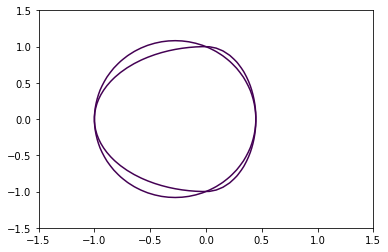

In [205]:
plt.contour(*X,asym.norm(X),levels=[1.])
plt.contour(*X,zerm(X),levels=[1.])